In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the OCR letter recognition dataset from the CSV file
url = "letter-recognition.csv"
data = pd.read_csv(url)

# Split features and labels
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

# Perform label encoding on the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 20
batch_size = 32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/20
500/500 [==============================] - 1s 2ms/step - loss: 1.5930 - accuracy: 0.5510
Epoch 2/20
500/500 [==============================] - 1s 2ms/step - loss: 0.8851 - accuracy: 0.7489
Epoch 3/20
500/500 [==============================] - 1s 2ms/step - loss: 0.7190 - accuracy: 0.7937
Epoch 4/20
500/500 [==============================] - 1s 2ms/step - loss: 0.6162 - accuracy: 0.8213
Epoch 5/20
500/500 [==============================] - 1s 2ms/step - loss: 0.5375 - accuracy: 0.8379
Epoch 6/20
500/500 [==============================] - 1s 2ms/step - loss: 0.4828 - accuracy: 0.8536
Epoch 7/20
500/500 [==============================] - 1s 2ms/step - loss: 0.4335 - accuracy: 0.8683
Epoch 8/20
500/500 [==============================] - 1s 2ms/step - loss: 0.4014 - accuracy: 0.8769
Epoch 9/20
500/500 [==============================] - 1s 2ms/step - loss: 0.3665 - accuracy: 0.8862
Epoch 10/20
500/500 [==============================] - 1s 2ms/step - loss: 0.3438 - accuracy: 0.8936

KeyError: 'val_accuracy'

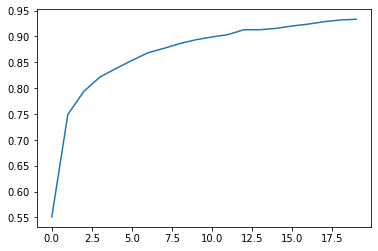

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Generate predictions on the testing set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Create confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Epoch 1/20
500/500 [==============================] - 1s 2ms/step - loss: 1.6802 - accuracy: 0.5292
Epoch 2/20
500/500 [==============================] - 1s 2ms/step - loss: 0.9094 - accuracy: 0.7424
Epoch 3/20
500/500 [==============================] - 1s 2ms/step - loss: 0.7263 - accuracy: 0.7886
Epoch 4/20
500/500 [==============================] - 1s 2ms/step - loss: 0.6202 - accuracy: 0.8141
Epoch 5/20
500/500 [==============================] - 1s 2ms/step - loss: 0.5386 - accuracy: 0.8387
Epoch 6/20
500/500 [==============================] - 1s 2ms/step - loss: 0.4799 - accuracy: 0.8521
Epoch 7/20
500/500 [==============================] - 1s 2ms/step - loss: 0.4261 - accuracy: 0.8691
Epoch 8/20
500/500 [==============================] - 1s 2ms/step - loss: 0.3896 - accuracy: 0.8773
Epoch 9/20
500/500 [==============================] - 1s 2ms/step - loss: 0.3607 - accuracy: 0.8883
Epoch 10/20
500/500 [==============================] - 1s 2ms/step - loss: 0.3282 - accuracy: 0.8966

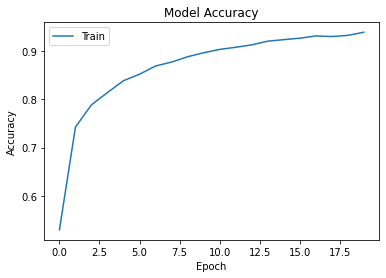

125/125 [==============================] - 0s 1ms/step


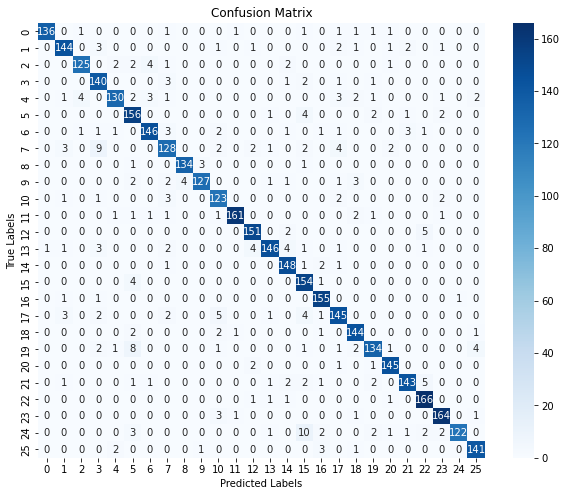

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the OCR letter recognition dataset from the CSV file
url = "letter-recognition.csv"
data = pd.read_csv(url)

# Split features and labels
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

# Perform label encoding on the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 20
batch_size = 32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Plot accuracy graph
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Generate predictions on the testing set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Create confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [10]:
confusion_mat

array([[136,   0,   1,   0,   0,   0,   0,   1,   0,   0,   0,   1,   0,
          0,   0,   1,   0,   1,   1,   1,   1,   0,   0,   0,   0,   0],
       [  0, 144,   0,   3,   0,   0,   0,   0,   0,   0,   1,   0,   1,
          0,   0,   0,   0,   2,   1,   0,   1,   2,   0,   1,   0,   0],
       [  0,   0, 125,   0,   2,   2,   4,   1,   0,   0,   0,   0,   0,
          0,   2,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,   0,   0, 140,   0,   0,   0,   3,   0,   0,   0,   0,   0,
          0,   1,   2,   0,   1,   0,   1,   0,   0,   0,   0,   0,   0],
       [  0,   1,   4,   0, 130,   2,   3,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   3,   2,   1,   0,   0,   0,   1,   0,   2],
       [  0,   0,   0,   0,   0, 156,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   4,   0,   0,   0,   2,   0,   1,   0,   2,   0,   0],
       [  0,   0,   1,   1,   1,   0, 146,   3,   0,   0,   2,   0,   0,
          0,   1,   0,   1,   1,   0,   0,   